In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.data.shape)

(506, 13)


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
import pandas as pd
bos = pd.DataFrame(boston.data)

In [8]:
bos.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [9]:
bos.columns = boston.feature_names
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['Price'] = boston.target
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [12]:
# split the dependent and independent variable
X = bos.drop("Price",1)   #Feature Matrix
y = bos["Price"]          #Target Variable
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df1 = bos.copy()

###### We will perform everything on df1 so that our old data remains safe.

#### Step1 : Create Linear Regression Model

In [14]:
X = df1.drop('Price',axis=1)
y = df1.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

/Users/aniruddhakalbande/anaconda2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 05 Sep 2019   Prob (F-statistic):          6.72e-135
Time:                        00:05:24   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 2 : Construct residual Plot

In [28]:
#residual plot
sns.set(style = 'whitegrid')

df1['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals.head()

0   -0.579887
1   -0.246512
2    0.318402
3    0.183733
4    0.708898
dtype: float64

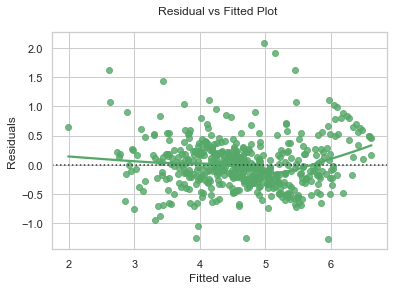

In [29]:
ax = sns.residplot(df1.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

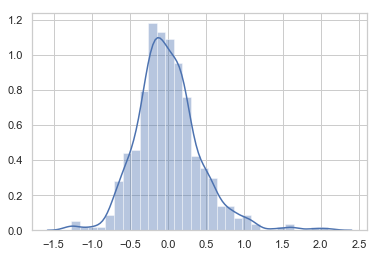

In [30]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)
plt.show()

#### Step 3 : If the residual plot is normal then compute the R2 value, do not transform. If it is not normal then go for transformation. As, here the residual plot is normal so no need of transformation.

###### If suppose this residual plot have not been normal then we would have gone with transformation techniques. Let's see few transformation techniques.

In [31]:
## old data
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
## for sqrt(X)
df2 = bos.copy()
final_df = df2.transform(lambda x: x**0.5)
final_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.079498,4.242641,1.519868,0.0,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591,4.898979
1,0.165257,0.000000,2.658947,0.0,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243,4.647580
2,0.165197,0.000000,2.658947,0.0,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486,5.890671
3,0.179917,0.000000,1.476482,0.0,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643,5.779273
4,0.262774,0.000000,1.476482,0.0,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679,6.016644


#### Step 4 : Apply Regression

In [33]:
X = final_df.drop('Price',axis=1)
y = final_df.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     150.5
Date:                Thu, 05 Sep 2019   Prob (F-statistic):          5.21e-162
Time:                        00:19:13   Log-Likelihood:                -278.08
No. Observations:                 506   AIC:                             584.2
Df Residuals:                     492   BIC:                             643.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1299      0.908     11.161      0.000       8.347      11.913
CRIM          -0.1512      0.027     -5.638      0.000      -0.204      -0.098
ZN             0.0153      0.010      1.489      0.137      -0.005       0.035
INDUS         -0.0161      0.035     -0.456      0.648      -0.085       0.053
CHAS           0.2378      0.077      3.070      0.002       0.086       0.390
NOX           -2.8083      0.558     -5.033      0.000      -3.905      -1.712
RM             1.0707      0.191      5.594      0.000       0.695       1.447
AGE            0.0116      0.016      0.711      0.478      -0.021       0.044
DIS           -0.6481      0.081     -8.044      0.000      -0.806      -0.490
RAD            0.2430      0.037      6.532      0.000       0.170       0.316
TAX           -0.0447      0.012     -3.785      0.000      -0.068      -0.022
PTRATIO       -0.7331      0.099     -7.408      0.000      -0.928      -0.539
B              0.0212      0.006      3.488      0.001       0.009       0.033
LSTAT         -0.5275      0.035    -15.286      0.000      -0.595      -0.460
==============================================================================
Omnibus:                       81.549   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.809
Skew:                           0.807   Prob(JB):                     1.67e-46
Kurtosis:                       5.719   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#residual plot
sns.set(style = 'whitegrid')

df2['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals.head()

0   -0.579887
1   -0.246512
2    0.318402
3    0.183733
4    0.708898
dtype: float64

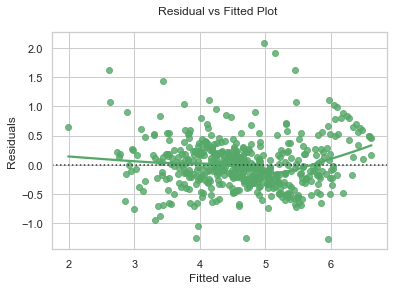

In [36]:
ax = sns.residplot(df2.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

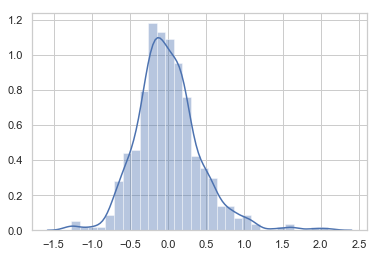

In [39]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)
plt.show()

### Generally we use transformation when the residual plots vary from the normal distribution.

##### Let's see few more transformation techniques

##### log transform

In [40]:
df2 = bos.copy()
df_final1 = df2.transform(lambda X: np.log(X))
df_final1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,2.890372,0.837248,-inf,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,-inf,1.955860,-inf,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,-inf,1.955860,-inf,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,-inf,0.779325,-inf,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,-inf,0.779325,-inf,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


##### Inverse transform

In [41]:
df_final1 = df2.transform(lambda X: 1/X)
df_final1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,158.227848,0.055556,0.432900,inf,1.858736,0.152091,0.015337,0.244499,1.000000,0.003378,0.065359,0.002520,0.200803,0.041667
1,36.616624,inf,0.141443,inf,2.132196,0.155739,0.012674,0.201325,0.500000,0.004132,0.056180,0.002520,0.109409,0.046296
2,36.643459,inf,0.141443,inf,2.132196,0.139179,0.016367,0.201325,0.500000,0.004132,0.056180,0.002546,0.248139,0.028818
3,30.892802,inf,0.458716,inf,2.183406,0.142898,0.021834,0.164957,0.333333,0.004505,0.053476,0.002534,0.340136,0.029940
4,14.482259,inf,0.458716,inf,2.183406,0.139919,0.018450,0.164957,0.333333,0.004505,0.053476,0.002520,0.187617,0.027624


##### exponential transform

In [27]:
df2 = bos.copy()
df_final1 = df2.transform(lambda X: np.exp(X))
df_final1.head()

/Users/aniruddhakalbande/anaconda2/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,1.006340,6.565997e+07,10.074425,1.0,1.712578,716.945624,2.070142e+28,59.739892,2.718282,3.557678e+128,4.412712e+06,2.352230e+172,145.474382,2.648912e+10
1,1.027686,1.000000e+00,1176.148034,1.0,1.598395,614.617424,1.844313e+34,143.609814,7.389056,1.256796e+105,5.375784e+07,2.352230e+172,9320.765132,2.403039e+09
2,1.027666,1.000000e+00,1176.148034,1.0,1.598395,1319.489238,3.430780e+26,143.609814,7.389056,1.256796e+105,5.375784e+07,4.016995e+170,56.260911,1.174948e+15
3,1.032900,1.000000e+00,8.846306,1.0,1.580909,1094.442084,7.774765e+19,429.318900,20.085537,2.590449e+96,1.322229e+08,2.430141e+171,18.915846,3.202106e+14
4,1.071490,1.000000e+00,8.846306,1.0,1.580909,1270.289365,3.457490e+23,429.318900,20.085537,2.590449e+96,1.322229e+08,2.352230e+172,206.437974,5.265750e+15
